# Gender Classification using Hog features

## Accuracy Results
#### Case1:
- Normalize Image
- convert it to gray scale
- Results:
    - knn: 0.6538461538461539
    - svm: 0.6794871794871795
    - random forest: 0.7435897435897436

#### Case2:
- convert it to gray scale
- Results:
    - knn: 0.6666666666666666
    - svm: 0.7051282051282052
    - random forest: 0.717948717948718

#### Case3:
- Binary thresholding
- textarea extraction
- Normalize Image
- Results:
    - knn: 0.5897435897435898
    - svm: 0.5256410256410257
    - random forest: 0.5128205128205128

#### Case4:
- Binary thresholding
- Normalize Image
- Results:
    - knn: 0.5641025641025641
    - svm: 0.6282051282051282
    - random forest: 0.6666666666666666

#### Case5:
- gray scale img
- default params
    - svm: 0.6794871794871795
    - random forest: 0.7435897435897436
    - knn: 0.6538461538461539

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline  
import glob
import utilities as util
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage import exposure


Females handwritten samples


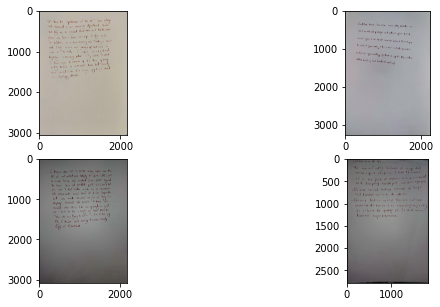

Males handwritten samples


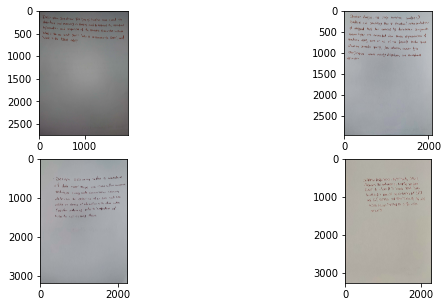

In [2]:
# Read the test images
female_imgs = util.read_imgs('../data/Female/Female')
male_imgs = util.read_imgs('../data/Male/Male')

# Preview 9 samples
print('Females handwritten samples')
util.draw_grid(figsize=(10,5), rows=2, cols=2, imgs=female_imgs[:4])
print('Males handwritten samples')
util.draw_grid(figsize=(10,5), rows=2, cols=2, imgs=male_imgs[:4])

In [3]:
def extract_hog_features(img, img_size=(128,64), orientations=9, pixels_per_cell=(8,8), cells_per_block=(3, 3)):
    img = rgb2gray(img)
    img = resize(img, img_size,anti_aliasing=True)
    hog_features= hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell,
                               cells_per_block=cells_per_block, block_norm='L2-Hys',
                               visualize=False, transform_sqrt=False, feature_vector=True, multichannel=None)
    return hog_features

### HOG Feature Extraction

In [4]:
# Binary Thresholding and Text Area Extraction on all images
females_count = len(female_imgs) 

males_count = len(male_imgs)

X = []
y = []
# Calculating features for females' images
for i in range(females_count):
    hog_features = extract_hog_features(female_imgs[i], orientations=9, pixels_per_cell=(8,8))
    X.append(hog_features)
    y.append(1)
    
# Calculating features for males' images
for i in range(males_count):
    hog_features = extract_hog_features(male_imgs[i], orientations=9, pixels_per_cell=(8,8))
    X.append(hog_features)
    y.append(0)
    

c:\Users\halah\Python\Python39\lib\site-packages\skimage\_shared\utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)


KeyError: None

In [ ]:
np.shape(X)

(258, 6804)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) 

clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7051282051282052


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6410256410256411


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666
